In [98]:
from google.colab import drive

drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [99]:
path_to_csv = "/content/drive/MyDrive/UIT - Semester 6/Data Analysis in Business/Dataset"

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [101]:
df = pd.read_csv(path_to_csv + "/SONY.csv")
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [102]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2704.938, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2722.807, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2714.251, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2716.111, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2723.351, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2708.268, Time=1.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2709.387, Time=0.63 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2702.955, Time=2.83 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2711.387, Time=0.62 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2704.916, Time=4.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2703.255, Time=3.59 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2709.906, Time=2.60 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2706.844, Time=6.49 sec
 ARIMA(3,1,2)(0,0,0)[0]             : 

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True)

In [104]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [105]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[102.19815353 102.46837324 102.88258023 102.97970947 102.82179137
 102.77271517 102.94464243 103.13838358 103.19063697 103.16648712
 103.20576685 103.32480701 103.43519409 103.48733939 103.52007707
 103.58416008 103.67512545 103.7563664  103.81501812 103.8704924
 103.94001496 104.01781474 104.08961704 104.15315845 104.21720536
 104.28711461 104.35922697 104.42829278 104.4945294  104.5616171 ]


In [106]:
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

print('Testing RMSE:', test_rmse)

Testing RMSE: 11.816613543408058


In [107]:
from sklearn.metrics import mean_absolute_error

test_mae = mean_absolute_error(y_pred , y_test)
print("Testing MAE: {}".format(test_mae))

Testing MAE: 9.368594780221681


In [108]:
from sklearn.metrics import mean_absolute_percentage_error

test_mape = mean_absolute_percentage_error(y_test, y_pred)
print("Testing MAPE: ", test_mape)

Testing MAPE:  0.09149879770623566


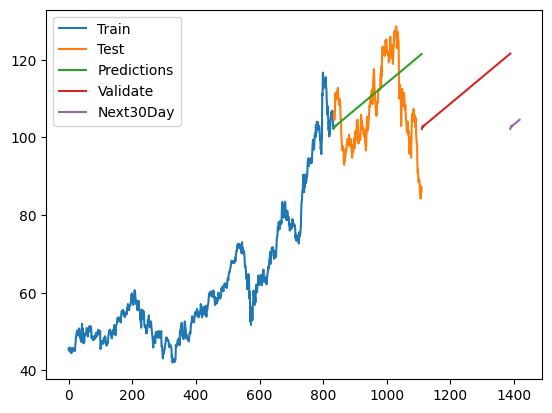

In [109]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()